# Bellabeat - Case Study with R 


### About Bellabeat 
Bellabeat, a high-tech manufacturer of health-focused products for women, wants to analyze smart device data to identify trends and gain insights on how the company can improve her app, which provides data related to activity, sleep, stress, menstrual cycle, and mindfulness habits so users can better understand their habits and make healthy decisions. Using the information gained through this analysis, we will gather suggestions on how Bellabeat can help its users better understand their habits and make healthy decisions. 
 
### About the data 
We’re going to use Fitbit Fitness Tracker Data, a dataset of 30 Fitbit users who have consented to the submission of personal tracker data. As the population sample is small, generalizations have to be seen carefully. Mainly two datasets – provided by Fitbit – will be used, Daily Activity data set so I can analyze steps and distance walked on a daily basis by users as well as the intensity of exercises and calories. The dataset that gathers information about sleep (Sleep Day) will also be used in this analysis. 


## Exploratory Data Analysis

In [1]:
#  Installing and loading packages

install.packages("tidyverse")
library(tidyverse)
library(ggplot2) # data visualisation
library(dplyr) # data manipulation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Daily Activity

The Daily Activity dataset has information related to calories, steps, distance walked, and the intensity of the activity associated with the distance and minutes. 

Here are some questions I want to uncover with this data: 
* What is the average of steps and distance the Fitbit users walk every day?
* What user percentage surpasses the average? And how many people reach the recommendation of researchers?
* What’s the correlation between the types of activities and calories? What are the “best types of exercises” for people interested in burning calories?
* How does the data vary on weekdays vs. weekends?


In [2]:
# Importing the dataset and viewing the summary
daily_activity <- read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
str(daily_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [3]:
head(daily_activity)
colnames(daily_activity)

#testing for missing values
print(sum(is.na(daily_activity)))


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] 0


'daily_activity' data has no missing values, the naming and data types are consistent. The only column that would need cleaning is 'Activity Date' as it's stored as a string and not DateTime. So the next step will be transform the column into two diferent columns, one as datetime and other giving the day of the week. 

In [4]:
# Data cleaning for dates

library(lubridate)


#transforming and adding another column in datetime
daily_activity$new_date <- mdy(daily_activity$ActivityDate) 

# adding another column with the days of the week 
daily_activity$day_of_week <- wday(daily_activity$new_date, label=TRUE)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#### Steps, distance, and average

The Fitbit tracker starts everyone off with a [10,000-step goal](https://blog.fitbit.com/should-you-really-take-10000-steps-a-day/) — satisfying the CDC’s recommendation of at least 150 minutes of moderate exercise per week. However, some studies point to the mark of [7,000 or 7,500](https://www.usatoday.com/story/news/health/2021/09/16/how-many-steps-should-take-per-day-study-death-risk/8321904002/) indicating a 50% to 70% reduction in premature mortality risk.

Establishing a lower goal for users is a good strategy to motivate people, especially for those who do little activity. That's the reason we're using 7,000 steps as the metric in this analysis. 


In [5]:
# calculating the average of steps and distance
mean_dist <- mean(daily_activity$TotalDistance)
mean_steps <- mean(daily_activity$TotalSteps)
goal_steps <- 7000

print(mean_dist)
print(mean_steps)

# summarising the data
walking_data <- daily_activity %>% 
    group_by(Id) %>% 
    summarise(dist = mean(TotalDistance), steps = mean(TotalSteps))

sum_data <- walking_data %>% 
    group_by(Id) %>%
    summarise(dist_sum = sum(dist >= mean_dist), 
              steps_sum = sum(steps >= mean_steps), 
              goal = sum(steps >= goal_steps))


[1] 5.489702
[1] 7637.911


In [6]:
sum_data %>% 
    summarise (dist_perc = (sum(dist_sum)*100)/length(dist_sum),
               steps_perc = (sum(steps_sum)*100)/length(steps_sum),
               goal_steps_perc = (sum(goal)*100/length(goal)))

dist_perc,steps_perc,goal_steps_perc
<dbl>,<dbl>,<dbl>
45.45455,45.45455,60.60606



45% of people reach the mark of about 7,638 steps a day, which is the average step taken by the participants. Considering 7,000 steps as the target established by the 2021 JAMA Network research as ideal, 60% of participants reach this goal. 


To view the performance of each user with their daily steps, distance, and calories, stat_summary_bin is used so we get the graphs below. 

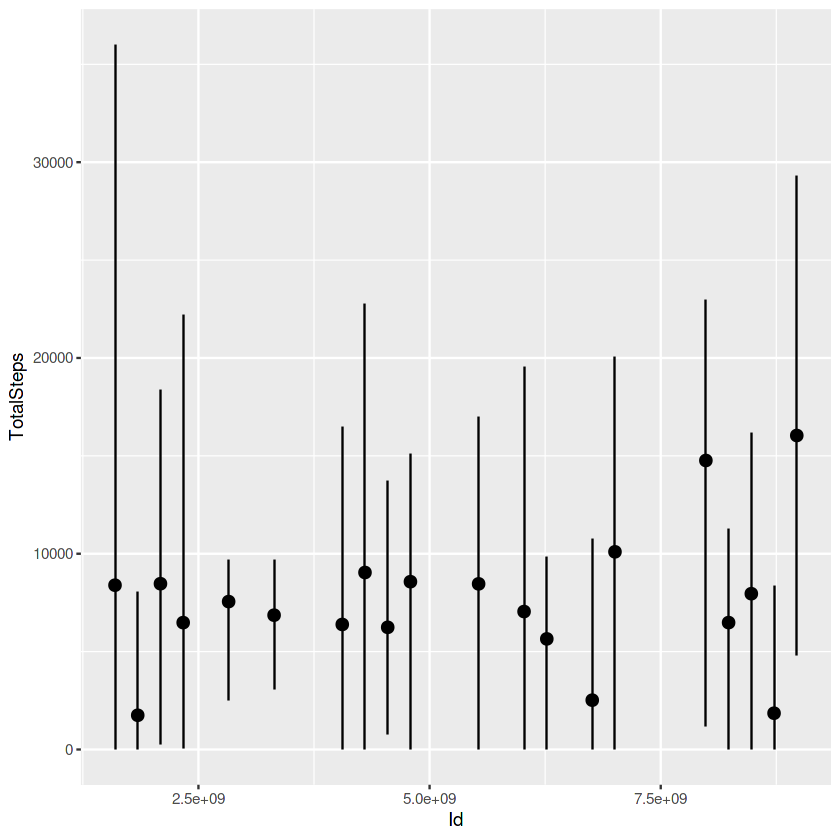

In [7]:
#Total Steps

ggplot(data = daily_activity) + 
  stat_summary_bin(
    mapping = aes(x = Id, y = TotalSteps),
    fun.min = min,
    fun.max = max,
    fun = mean)

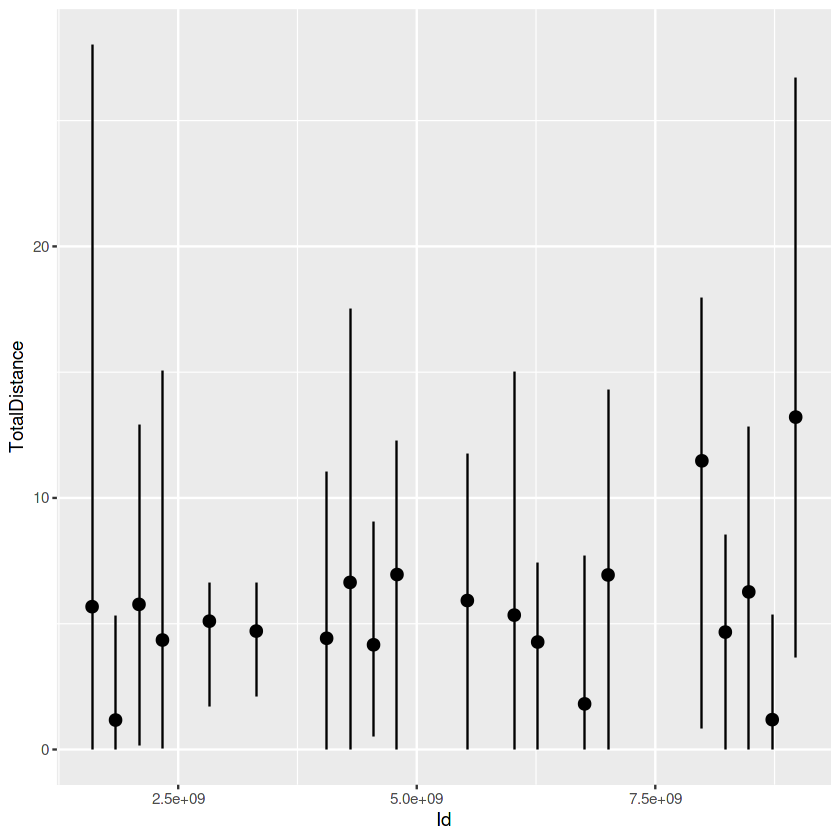

In [8]:
#Total Distance

ggplot(data = daily_activity) + 
  stat_summary_bin(
    mapping = aes(x = Id, y = TotalDistance),
    fun.min = min,
    fun.max = max,
    fun = mean)

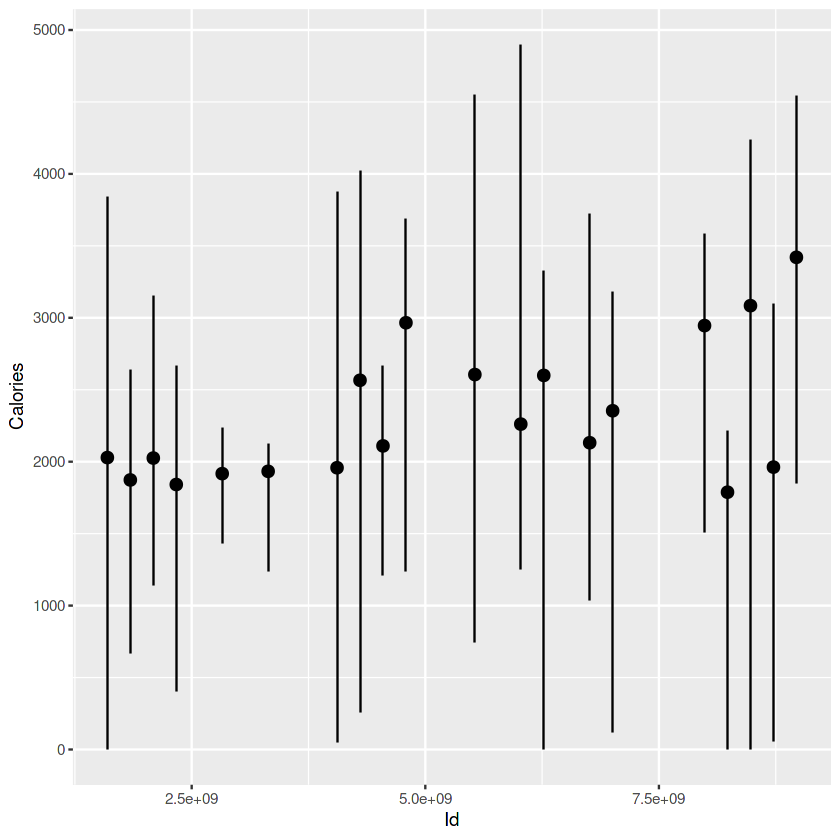

In [9]:
# Calories

ggplot(data = daily_activity) + 
  stat_summary_bin(
    mapping = aes(x = Id, y = Calories),
    fun.min = min,
    fun.max = max,
    fun = mean)

#### Activities, calories, and correlation

The next step is to observe the correlation between calories and steps, distance, and variables with active minutes and their intensity (Very Active Minute, Fairly Active Minutes, Lightly Active Minutes, and Sedendary Minutes). 

Fitbits' instructionS for its users show that you get active minutes with ["heart-pumping activity throughout the day, including a brisk walk, run, or interval workout"](https://help.fitbit.com/articles/en_US/Help_article/1379.htm).

For 'TotalSteps' and 'TotalDistance, we view the correlation for each user individually.  


[1] 0.5915681

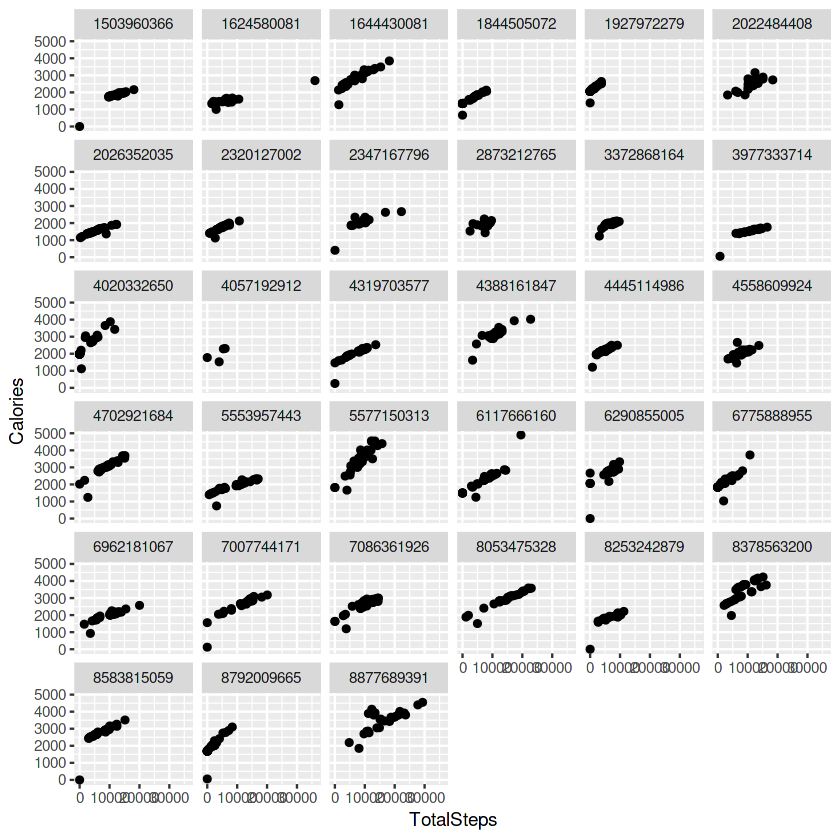

In [10]:
#Relation between Total Steps and Calories

ggplot(data = daily_activity) + 
  geom_point(mapping = aes(x = TotalSteps, y = Calories)) + 
  facet_wrap(~ Id)

cor(daily_activity$Calories,daily_activity$TotalSteps)

[1] 0.6449619

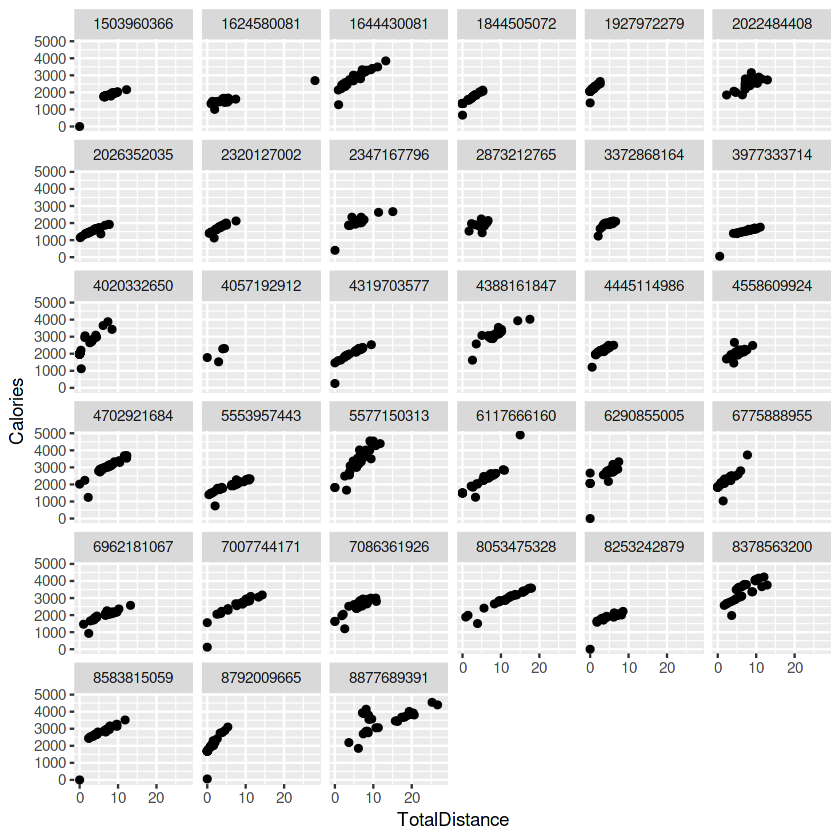

In [11]:
#Relation between Total Distance and Calories

ggplot(data = daily_activity) + 
  geom_point(mapping = aes(x = TotalDistance, y = Calories)) + 
  facet_wrap(~ Id)

cor(daily_activity$Calories,daily_activity$TotalDistance)

[1] 0.6449619

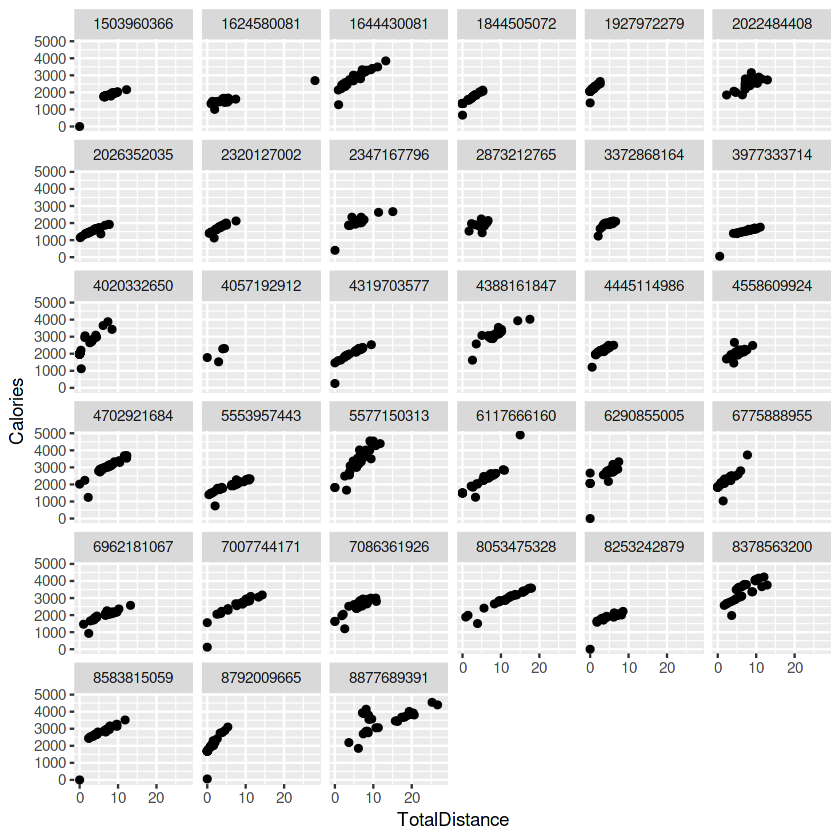

In [12]:
#Relation between Total Distance and Calories

ggplot(data = daily_activity) + 
  geom_point(mapping = aes(x = TotalDistance, y = Calories)) + 
  facet_wrap(~ Id)

cor(daily_activity$Calories, daily_activity$TotalDistance)

[1] 0.6158383

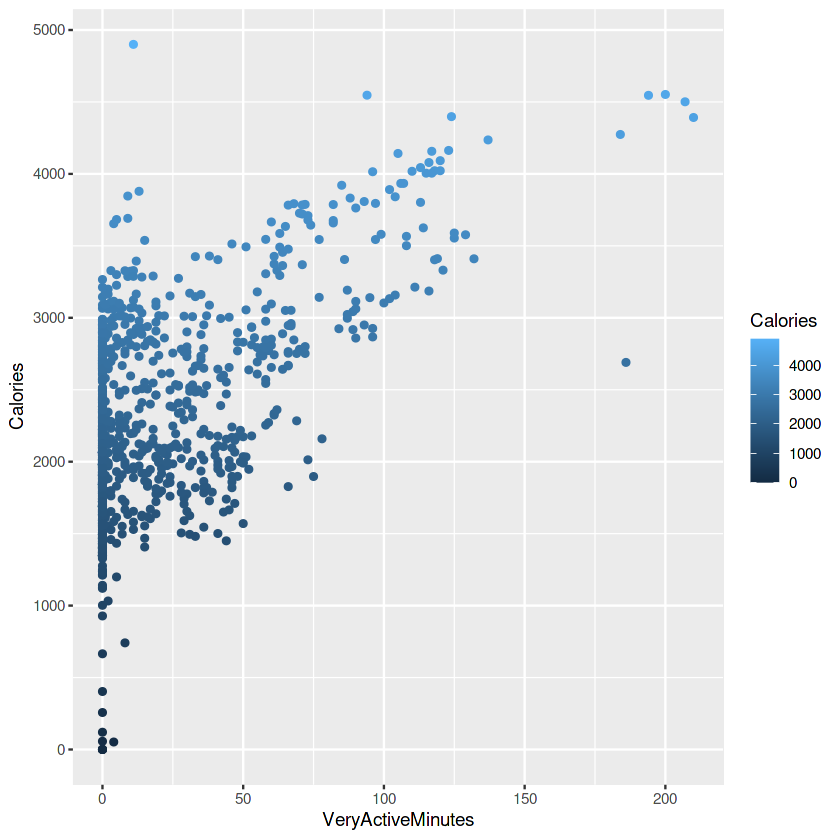

In [13]:
# Relation between Very Active Minutes and Calories

ggplot (data=daily_activity) + 
    geom_point(mapping=aes (x=VeryActiveMinutes, y=Calories, color=Calories))


cor(daily_activity$Calories, daily_activity$VeryActiveMinutes)


[1] 0.2976235

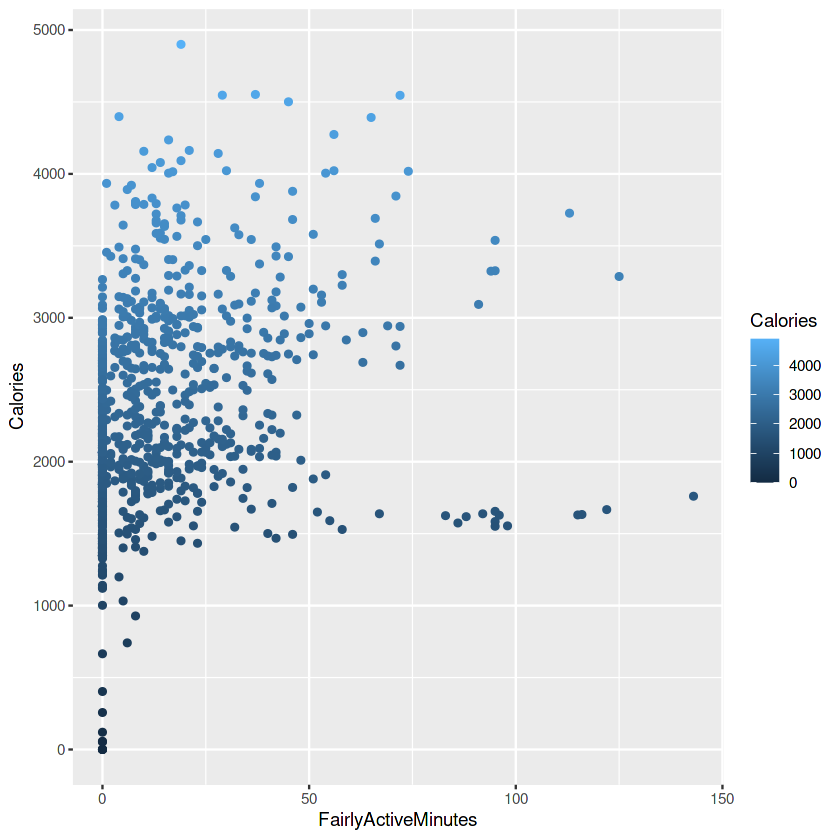

In [14]:
# Relation between Fairly Active Minutes and Calories

ggplot (data=daily_activity) + 
    geom_point(mapping=aes (x=FairlyActiveMinutes, y=Calories, color=Calories))

cor(daily_activity$Calories, daily_activity$FairlyActiveMinutes)

[1] 0.2867175

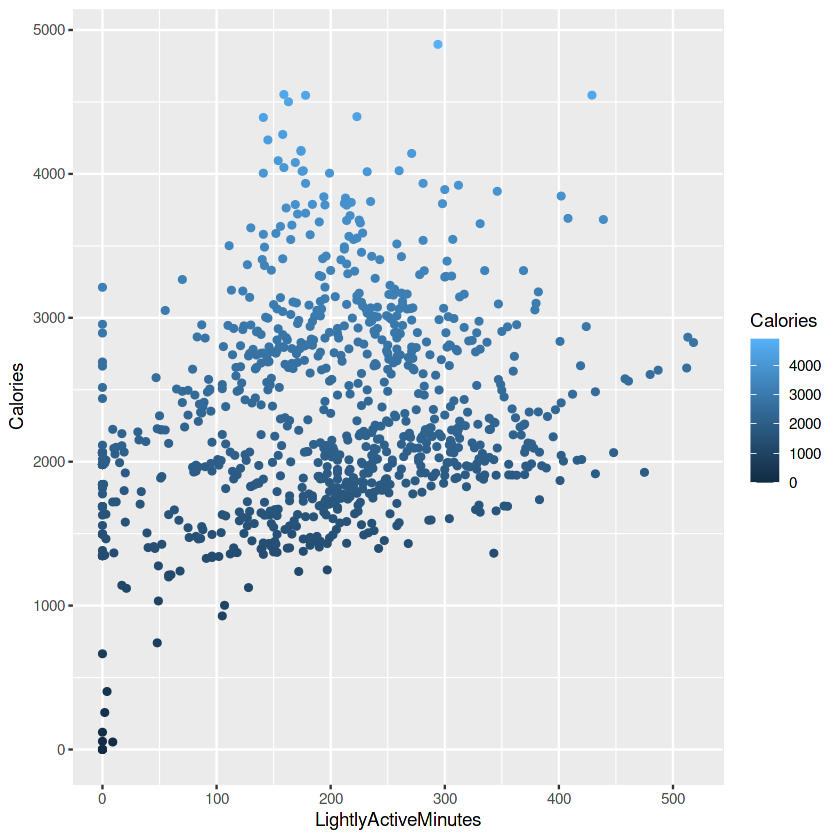

In [15]:
# Relation between Lightly Active Minutes and Calories

ggplot (data=daily_activity) + 
    geom_point(mapping=aes (x=LightlyActiveMinutes, y=Calories, color=Calories))

cor(daily_activity$Calories, daily_activity$LightlyActiveMinutes)

[1] -0.106973

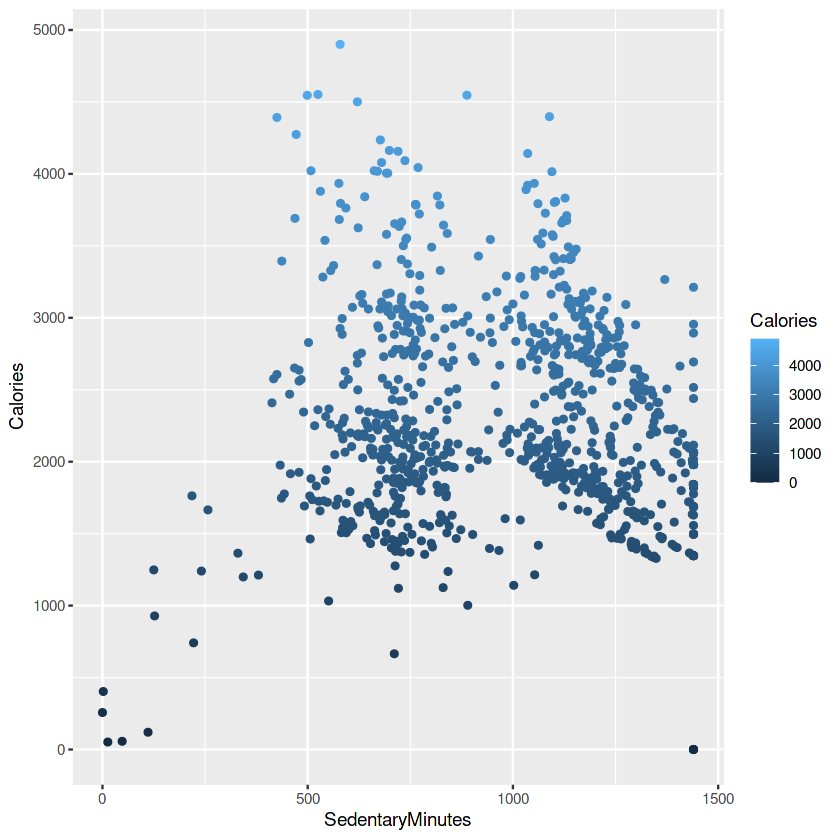

In [16]:
# Relation between Sedentary Minutes and Calories

ggplot (data=daily_activity) + 
    geom_point(mapping=aes (x=SedentaryMinutes, y=Calories, color=Calories))

cor(daily_activity$Calories, daily_activity$SedentaryMinutes)

This exploration doesn't have any surprises. The highest correlation coefficient appears between Calories and 'TotalDistance' (0.64), 'VeryActiveMinutes' (0.61) , and 'TotalSteps' (0.59). So if the personal goal is burning calories, those are the types of activities and metrics users should pay more attention to. 

#### Days of the week

Next, the relation between the days of the week and how active are the users throughout the week is investigated.


# A tibble: 7 x 2
  day_of_week TotalSteps
  <ord>            <dbl>
1 Sun              6933.
2 Mon              7781.
3 Tue              8125.
4 Wed              7559.
5 Thu              7406.
6 Fri              7448.
7 Sat              8153.


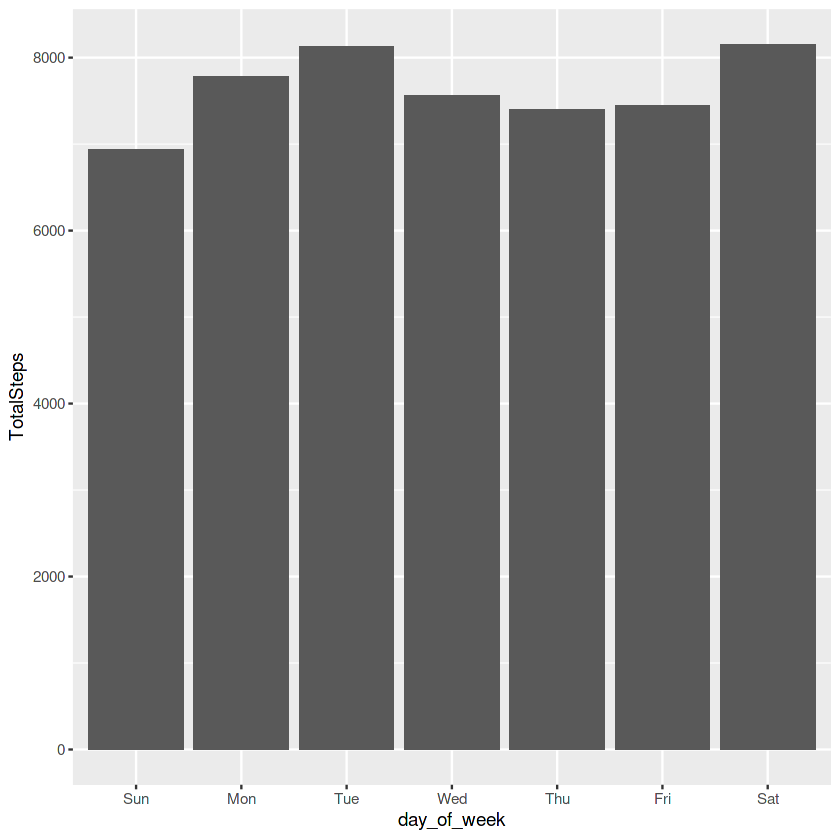

In [17]:
# Steps 

steps_bar_data <- daily_activity %>% 
    group_by(day_of_week) %>%
    summarise(TotalSteps = mean(TotalSteps))

print(steps_bar_data)

ggplot(data = steps_bar_data, aes(x=day_of_week, y=TotalSteps)) + 
  geom_bar(stat = "identity")

# A tibble: 7 x 2
  day_of_week Calories
  <ord>          <dbl>
1 Sun            2263 
2 Mon            2324.
3 Tue            2356.
4 Wed            2303.
5 Thu            2200.
6 Fri            2332.
7 Sat            2355.


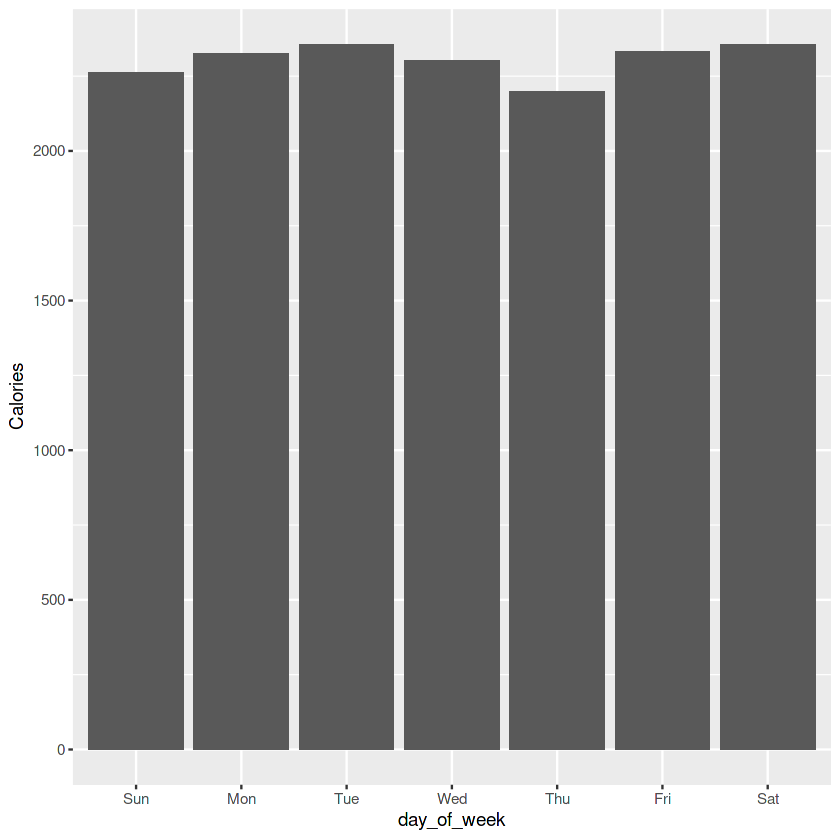

In [18]:
# Calories 

calories_bar_data <- daily_activity %>% 
    group_by(day_of_week) %>%
    summarise(Calories = mean(Calories))

print(calories_bar_data)

ggplot(data = calories_bar_data, aes(x=day_of_week, y=Calories)) + 
  geom_bar(stat = "identity")

# A tibble: 7 x 2
  day_of_week VeryActiveMinutes
  <ord>                   <dbl>
1 Sun                      20.0
2 Mon                      23.1
3 Tue                      23.0
4 Wed                      20.8
5 Thu                      19.4
6 Fri                      20.1
7 Sat                      21.9


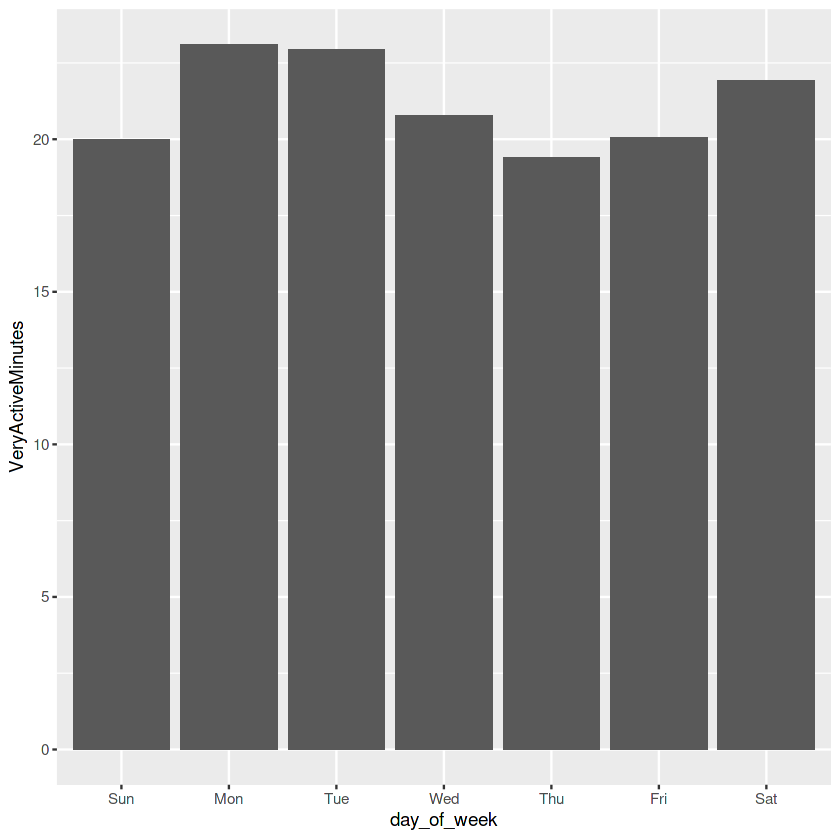

In [19]:
# Very Active Minutes 

active_bar_data <- daily_activity %>% 
    group_by(day_of_week) %>%
    summarise(VeryActiveMinutes = mean(VeryActiveMinutes))

print(active_bar_data)

ggplot(data = active_bar_data, aes(x=day_of_week, y=VeryActiveMinutes)) + 
  geom_bar(stat = "identity")

# A tibble: 7 x 2
  day_of_week SedentaryMinutes
  <ord>                  <dbl>
1 Sun                     990.
2 Mon                    1028.
3 Tue                    1007.
4 Wed                     989.
5 Thu                     962.
6 Fri                    1000.
7 Sat                     964.


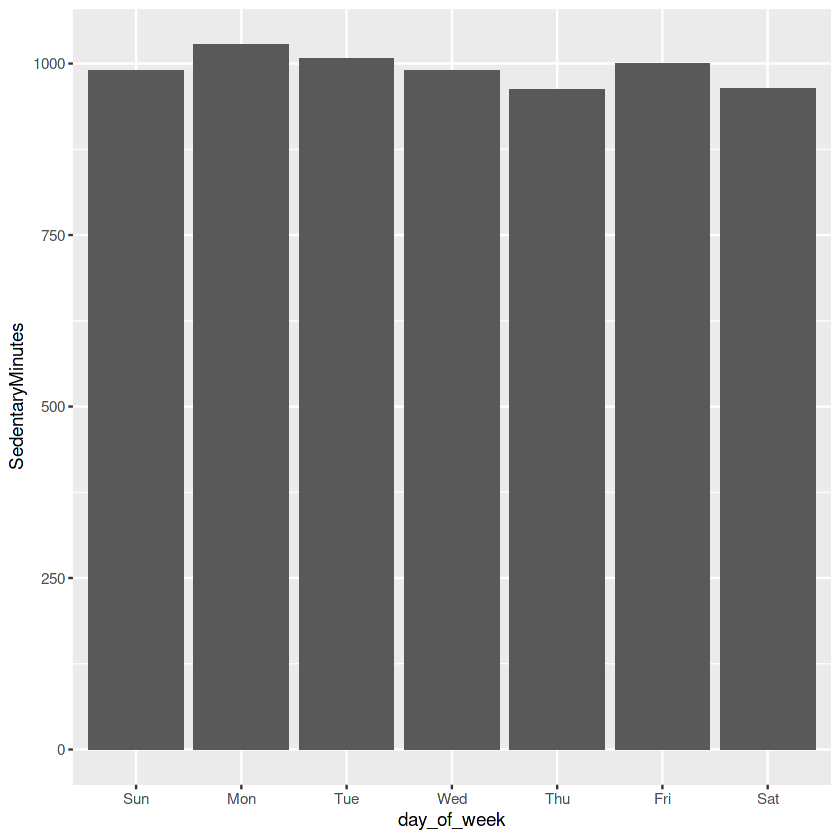

In [20]:
# Sedentary

sedentary_bar_data <- daily_activity %>% 
    group_by(day_of_week) %>%
    summarise(SedentaryMinutes = mean(SedentaryMinutes))

print(sedentary_bar_data)

ggplot(data = sedentary_bar_data, aes(x=day_of_week, y=SedentaryMinutes)) + 
  geom_bar(stat = "identity")

Looking at steps and Very Active Minutes graphs, the most active days are Monday and Tuesday. However, calories and sedentary graphs don't show much difference between the days. Looking at the bar graph for sedentary minutes, Monday and Tuesday have slight increases. So these changes are more related to how people use the tracker, with the days they choose to exercise or rest. But more investigation would be needed. 

### Sleep

According to the Sleep Foundation, "sleep powers the mind, restores the body, and fortifies virtually every system in the body". The 'Sleep Day' dataset has information related to sleep day and time, total minutes asleep, and total minutes in bed for each night. 

Here are the questions that will guide our investigation: 

* What are the sleeping minutes average among the group? What is the time spent in bed average?
* How many people reach the sleeping time advised by doctors? (between 7 or 9 hours)
* Does the time increase during the weekend?


In [21]:
# Importing the dataset and viewing the summary

sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
str(sleep_day)


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)




spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )


In [22]:
head(sleep_day) 

#Checking for missing values
sum(is.na(sleep_day))

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] 0

The 'sleep_day' data set has no missing values, and the naming and data types are mostly consistent. However, the 'SleepDay' column is stored as a string and not as DateTime.

In [23]:
# transforming and adding another column in datetime
sleep_day$new_date <- mdy_hms(sleep_day$SleepDay)

# adding another column with days of the week 
sleep_day$day_of_week <- wday(sleep_day$new_date, label=TRUE)


**Ideal Night of Sleep**

National Sleep Foundation guidelines advise that healthy adults need between 7 and 9 hours of sleep per night. So this information will guide our analysis. 


In [24]:
ideal_min_start <- 420
ideal_min_end <- 540

mean_asleep = mean(sleep_day$TotalMinutesAsleep)
mean_bed = mean(sleep_day$TotalTimeInBed)


# Summarising the data
mean_data <- sleep_day %>% 
    group_by(Id) %>%
    summarise (asleep = mean(TotalMinutesAsleep), 
               bed = mean(TotalTimeInBed))

sum_data <- mean_data %>%
    group_by(Id) %>%
    summarise (asleep_sum = sum(asleep >= mean_asleep), 
              bed_sum = sum(bed >= mean_bed), 
              ideal = sum(asleep >= ideal_min_start & asleep <=ideal_min_end))


In [25]:
sum_data %>% 
    summarise (sleep_perc = sum(asleep_sum)*100/ length(asleep_sum), 
              bed_perc = sum(bed_sum)*100/ length(bed_sum), 
              ideal_perc = sum(ideal)*100/ length(ideal))

sleep_perc,bed_perc,ideal_perc
<dbl>,<dbl>,<dbl>
50,45.83333,45.83333


About 46% of the users have the ideal sleep time recommended by studies, that is between 7 or 9 hours of sleep. Investigating with the days of the week, Tuesdays, Thursdays and Fridays are the days that people don't sleep at least 7 hours.  

# A tibble: 7 x 2
  day_of_week TotalMinutesAsleep
  <ord>                    <dbl>
1 Sun                       453.
2 Mon                       419.
3 Tue                       405.
4 Wed                       435.
5 Thu                       402.
6 Fri                       405.
7 Sat                       421.


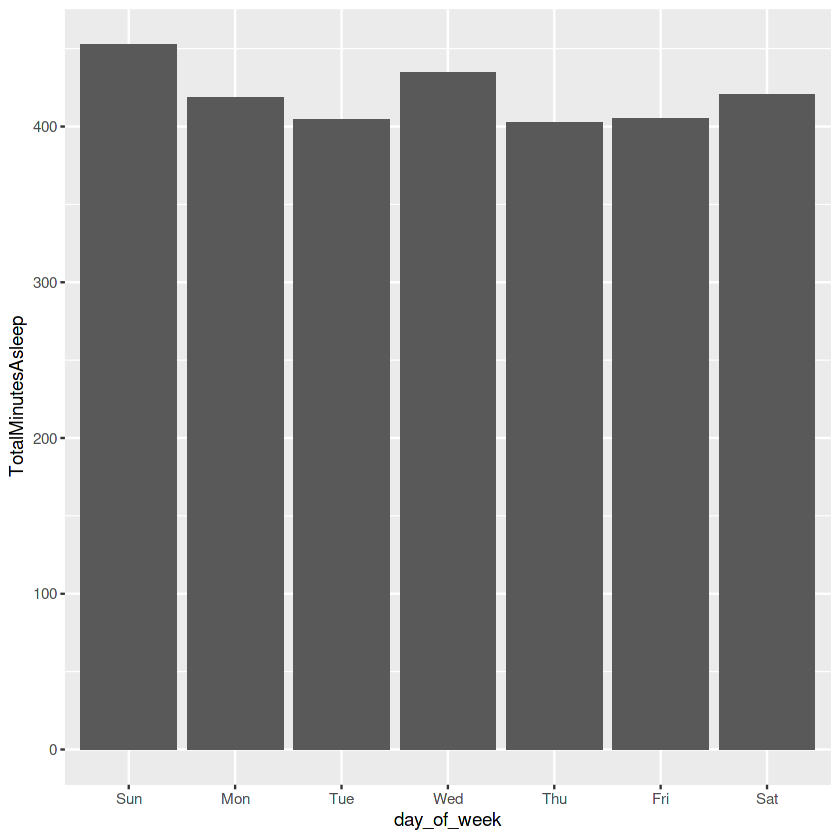

In [26]:
asleep_data <- sleep_day %>% 
    group_by (day_of_week) %>%
    summarise (TotalMinutesAsleep = mean(TotalMinutesAsleep))

print(asleep_data)

ggplot(data = asleep_data, aes(x=day_of_week, y=TotalMinutesAsleep)) + 
  geom_bar(stat = "identity")


# A tibble: 7 x 2
  day_of_week TotalTimeInBed
  <ord>                <dbl>
1 Sun                   504.
2 Mon                   456.
3 Tue                   443.
4 Wed                   470.
5 Thu                   436.
6 Fri                   445.
7 Sat                   461.


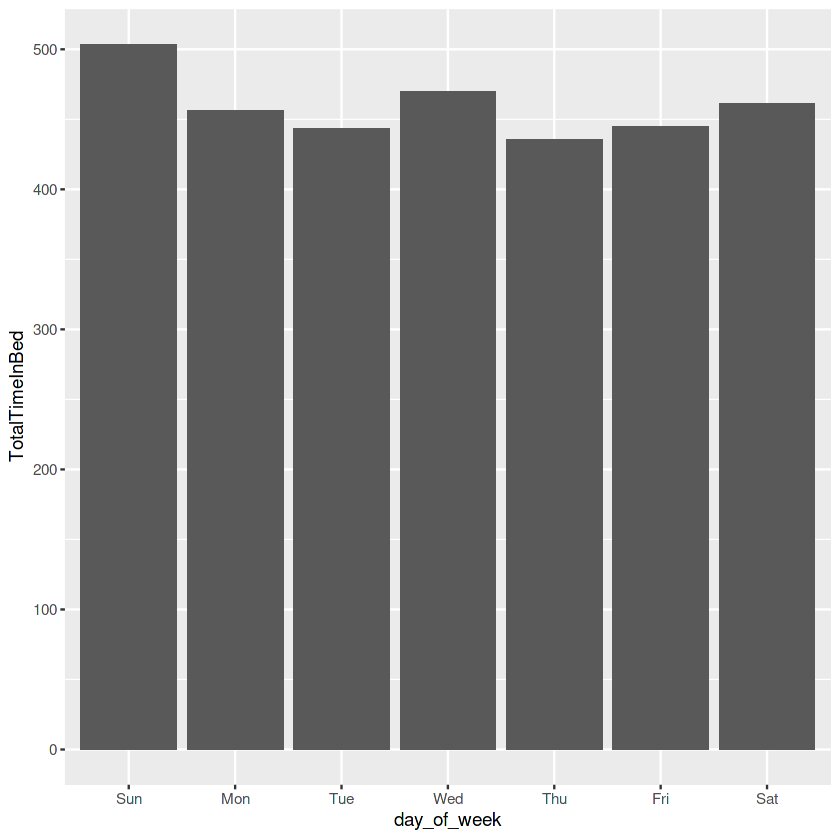

In [27]:
bed_data <- sleep_day %>% 
    group_by (day_of_week) %>%
    summarise (TotalTimeInBed = mean(TotalTimeInBed))

print(bed_data)

ggplot(data = bed_data, aes(x=day_of_week, y=TotalTimeInBed)) + 
  geom_bar(stat = "identity")

#### Final Recommendations


Following Bellabeat’s mission of empowering women by providing them with data to discover themselves, looking at the Fitbit Fitness Trackers Data has given important insights on the use of fitness and wellness apps by its users that can help unlock new growth activities. 

* The average of steps is 7,638 a day which is above the target of 7,000 established by JAMA Network research. Setting a lower goal is important for people who are starting, so guiding users with this achievable metric can be motivating.
* If the user's objective is to burn calories, the focus should be on how much this person walks every day or in Very Active activities.
* About 46% of the users follow the ideal sleep time (between 7 and 9 hours). Considering sleeping is essential for overall wellness, encouraging standard ways which can help achieve a good night's sleep is recommended. 


**This is my first project using R, so any comments and recommendations for improvement are appreciated. Thanks for reading!**